## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata)
print(study_results)

# Combine the data into a single dataset

dataset = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

dataset



# Display the data table for preview


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

mice_list = dataset["Mouse ID"].unique()
mice = len(mice_list)

m = {'Total Mice':[mice]}
df = pd.DataFrame(data=m)
df


,Total Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = dataset.loc[dataset.duplicated(subset=['Mouse ID','Timepoint'], keep=False), ["Mouse ID","Timepoint"]]
duplicates


,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates = dataset.loc[dataset.duplicated(subset=['Mouse ID','Timepoint'], keep=False), dataset.columns]
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# clean_dataframe = dataset.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False)
# clean_dataframe

clean_dataframe = dataset[dataset["Mouse ID"] != "g989"]
clean_dataframe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

mice_list = clean_dataframe ["Mouse ID"].unique()
mice = len(mice_list)

m = {'Total Mice':[mice]}
df = pd.DataFrame(data=m)
df


,Total Mice
0,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume

mean_tumor = clean_dataframe.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumor = clean_dataframe.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_tumor = clean_dataframe.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sd_tumor = clean_dataframe.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_tumor = clean_dataframe.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary dataframe

stats = pd.DataFrame ({"Mean":mean_tumor, "Median":median_tumor, "Variance":var_tumor, "Standard Deviation":sd_tumor,
                       "SEM":sem_tumor})

# Formatting
pd.options.display.float_format = '{:,.2f}'.format

stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

stats2 = clean_dataframe.groupby("Drug Regimen")

# Using the aggregation method, produce the same summary statistics in a single line

new_summ = stats2.agg (["mean","median","var","std","sem"])["Tumor Volume (mm3)"]

new_summ



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

bar_panda = clean_dataframe.groupby("Drug Regimen").count()["Mouse ID"]
data = pd.DataFrame({"Mice Count":bar_panda})
data

,Mice Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


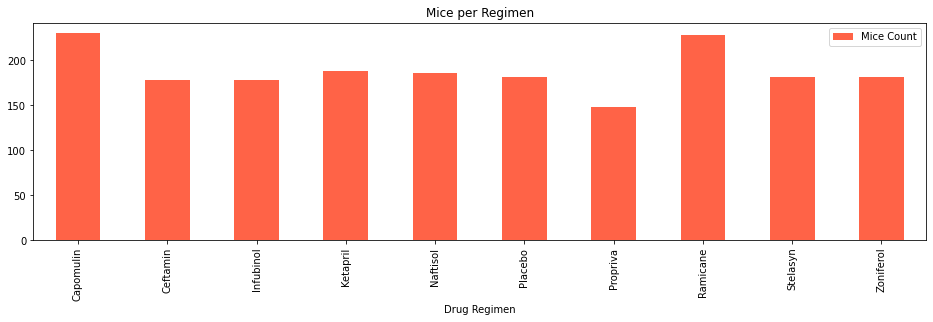

In [10]:
# Bar plot

data.plot.bar(figsize=(16,4), color = "tomato", rot=90)
plt.title("Mice per Regimen")
plt.show()

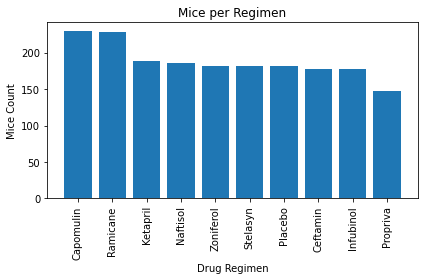

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_values = clean_dataframe['Drug Regimen'].value_counts().index
y_values= clean_dataframe['Drug Regimen'].value_counts().values

plt.bar(x_values,y_values)
plt.xticks(rotation = 90)
plt.title("Mice per Regimen")
plt.xlabel('Drug Regimen', fontsize = 10)
plt.ylabel('Mice Count', fontsize = 10)
plt.tight_layout()
plt.show()


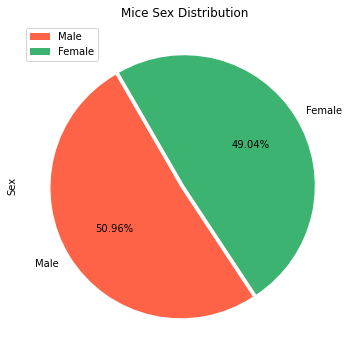

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

explode = (0.03,0)
y=clean_dataframe['Sex'].value_counts()
y.plot(kind='pie',autopct= '%1.2f%%',figsize=(6,6),explode = explode, startangle = 120, colors=["tomato",'mediumseagreen'])
plt.legend(y.index)
plt.title("Mice Sex Distribution")
plt.show()


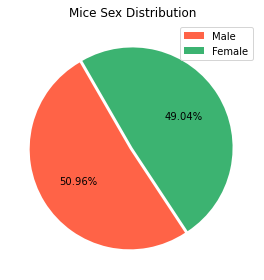

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

y = clean_dataframe['Sex'].value_counts()
explode=(0.03,0)
plt.pie(y, autopct= '%1.2f%%', explode = explode, startangle = 120, colors=["tomato",'mediumseagreen'])
plt.legend(y.index)
plt.title("Mice Sex Distribution")
plt.tight_layout()
plt.show() 


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tv = clean_dataframe[clean_dataframe['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
final_tv= final_tv.groupby(['Drug Regimen','Mouse ID']).last()[['Timepoint','Tumor Volume (mm3)']]
final_tv = final_tv.reset_index().sort_values(['Timepoint'], ascending = 'True')
final_tv

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
26,Ceftamin,b447,0,45.00
41,Ceftamin,t573,0,45.00
43,Ceftamin,u153,0,45.00
45,Ceftamin,x226,0,45.00
97,Ramicane,w678,5,43.17
...,...,...,...,...
32,Ceftamin,k210,45,68.92
31,Ceftamin,j296,45,61.85
25,Ceftamin,a275,45,63.00
39,Ceftamin,p438,45,61.43


In [26]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
